# Logistic regression

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('all-data.csv',delimiter=',',encoding='latin-1')
data = data.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predict sentiment labels for test data
y_pred = model.predict(X_test_vec)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7409700722394221
Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.43      0.56       115
     neutral       0.74      0.90      0.81       567
    positive       0.74      0.55      0.63       287

    accuracy                           0.74       969
   macro avg       0.75      0.63      0.67       969
weighted avg       0.74      0.74      0.73       969



In [38]:
# Example messages
example_messages = [
    "I am very satisfied with the company's performance.",
    "The recent changes in management have caused uncertainty.",
    "The company's profits are expected to increase next quarter.",
    "There is a lack of transparency in the company's financial reports."
]

X_example_vec = vectorizer.transform(example_messages)
y_pred_example = model.predict(X_example_vec)
for message, sentiment in zip(example_messages, y_pred_example):
    print(f"Message: {message}")
    print(f"Predicted Sentiment: {sentiment}")
    print()


Message: I am very satisfied with the company's performance.
Predicted Sentiment: positive

Message: The recent changes in management have caused uncertainty.
Predicted Sentiment: neutral

Message: The company's profits are expected to increase next quarter.
Predicted Sentiment: positive

Message: There is a lack of transparency in the company's financial reports.
Predicted Sentiment: neutral



# Naive bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

y_pred_nb = nb_classifier.predict(X_test_vec)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7131062951496389
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.39      0.53       115
     neutral       0.71      0.94      0.81       567
    positive       0.70      0.40      0.51       287

    accuracy                           0.71       969
   macro avg       0.75      0.58      0.62       969
weighted avg       0.72      0.71      0.69       969



In [40]:
from sklearn.naive_bayes import MultinomialNB

# Example messages
example_messages = [
    "I am very satisfied with the company's performance.",
    "The recent changes in management have caused uncertainty.",
    "The company's profits are expected to increase next quarter.",
    "There is a lack of transparency in the company's financial reports."
]

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)
X_example_vec = vectorizer.transform(example_messages)
y_pred_example_nb = nb_classifier.predict(X_example_vec)
for message, sentiment in zip(example_messages, y_pred_example_nb):
    print(f"Message: {message}")
    print(f"Predicted Sentiment: {sentiment}")
    print()


Message: I am very satisfied with the company's performance.
Predicted Sentiment: positive

Message: The recent changes in management have caused uncertainty.
Predicted Sentiment: neutral

Message: The company's profits are expected to increase next quarter.
Predicted Sentiment: positive

Message: There is a lack of transparency in the company's financial reports.
Predicted Sentiment: neutral



# SVC

In [41]:
from sklearn.svm import SVC

# Initialize and train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vec, y_train)

# Predict sentiment labels for test data
y_pred_svm = svm_classifier.predict(X_test_vec)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7512899896800825
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.51      0.61       115
     neutral       0.75      0.90      0.82       567
    positive       0.75      0.56      0.64       287

    accuracy                           0.75       969
   macro avg       0.75      0.66      0.69       969
weighted avg       0.75      0.75      0.74       969



# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_vec, y_train)

# Predict sentiment labels for test data
y_pred_rf = rf_classifier.predict(X_test_vec)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7471620227038184
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.42      0.56       115
     neutral       0.73      0.96      0.83       567
    positive       0.78      0.47      0.58       287

    accuracy                           0.75       969
   macro avg       0.79      0.61      0.66       969
weighted avg       0.76      0.75      0.72       969



# Gradient Boost 

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbm_classifier.fit(X_train_vec, y_train)

# Predict sentiment labels for test data
y_pred_gbm = gbm_classifier.predict(X_test_vec)

# Evaluate GBM model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Accuracy:", accuracy_gbm)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gbm))


Gradient Boosting Accuracy: 0.7368421052631579
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.48      0.55       115
     neutral       0.76      0.87      0.81       567
    positive       0.71      0.58      0.64       287

    accuracy                           0.74       969
   macro avg       0.70      0.64      0.67       969
weighted avg       0.73      0.74      0.73       969



# KNeighbors 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors (k) as needed
knn_classifier.fit(X_train_vec, y_train)

# Predict sentiment labels for test data
y_pred_knn = knn_classifier.predict(X_test_vec)

# Evaluate KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.6934984520123839
KNN Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.41      0.50       115
     neutral       0.70      0.95      0.80       567
    positive       0.70      0.30      0.42       287

    accuracy                           0.69       969
   macro avg       0.68      0.55      0.58       969
weighted avg       0.69      0.69      0.65       969



# Word2Vec + Logistic Regression

In [45]:
from gensim.models import Word2Vec
from gensim.models.word2vec import FAST_VERSION
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
nltk.download('punkt')

tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in data['Message']]

vector_size = 100  # Dimensionality of the word vectors
window_size = 5  # Maximum distance between the current and predicted word within a sentence
min_count = 1  # Minimum frequency count of words to consider in the model
sg = 1  # Skip-gram model (set to 0 for CBOW)
epochs = 50  # Number of iterations over the corpus

word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window_size, min_count=min_count, sg=sg, epochs=epochs, workers=4)

# Function to average word vectors for a document
def document_vector(word2vec_model, doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    if len(doc) != 0:
        return np.mean(word2vec_model.wv[doc], axis=0)
    else:
        return np.zeros(vector_size)

# Convert financial statements to document vectors
X_w2v = np.array([document_vector(word2vec_model, doc) for doc in tokenized_sentences])

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, data['sentiment'], test_size=0.2, random_state=42)

# Train logistic regression on document vectors
logistic_regression_w2v = LogisticRegression(max_iter=1000)
logistic_regression_w2v.fit(X_train_w2v, y_train_w2v)

# Predict sentiment labels for test data
y_pred_w2v = logistic_regression_w2v.predict(X_test_w2v)

# Evaluate the model
accuracy_w2v = accuracy_score(y_test_w2v, y_pred_w2v)
print("Word2Vec + Logistic Regression Accuracy:", accuracy_w2v)
print("Word2Vec + Logistic Regression Classification Report:")
print(classification_report(y_test_w2v, y_pred_w2v))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word2Vec + Logistic Regression Accuracy: 0.7058823529411765
Word2Vec + Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.36      0.46       115
     neutral       0.74      0.89      0.81       567
    positive       0.62      0.48      0.54       287

    accuracy                           0.71       969
   macro avg       0.67      0.58      0.60       969
weighted avg       0.69      0.71      0.69       969



# Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for logistic regression model
conf_matrix_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

# Confusion matrix for Naive Bayes model
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix for Naive Bayes:")
print(conf_matrix_nb)

# Confusion matrix for SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for SVM:")
print(conf_matrix_svm)

# Confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Confusion matrix for Gradient Boosting model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print("\nConfusion Matrix for Gradient Boosting:")
print(conf_matrix_gbm)

# Confusion matrix for KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for K-Nearest Neighbors:")
print(conf_matrix_knn)

# Confusion matrix for Word2Vec + Logistic Regression model
conf_matrix_w2v = confusion_matrix(y_test_w2v, y_pred_w2v)
print("\nConfusion Matrix for Word2Vec + Logistic Regression:")
print(conf_matrix_w2v)




Confusion Matrix for Logistic Regression:
[[ 50  53  12]
 [ 12 511  44]
 [  2 128 157]]

Confusion Matrix for Naive Bayes:
[[ 45  53  17]
 [  4 532  31]
 [  5 168 114]]

Confusion Matrix for SVM:
[[ 59  48   8]
 [ 12 509  46]
 [  6 121 160]]

Confusion Matrix for Random Forest:
[[ 48  50  17]
 [  4 542  21]
 [  4 149 134]]

Confusion Matrix for Gradient Boosting:
[[ 55  45  15]
 [ 21 493  53]
 [ 10 111 166]]

Confusion Matrix for K-Nearest Neighbors:
[[ 47  52  16]
 [  7 538  22]
 [ 19 181  87]]

Confusion Matrix for Word2Vec + Logistic Regression:
[[ 41  42  32]
 [  9 506  52]
 [ 14 136 137]]


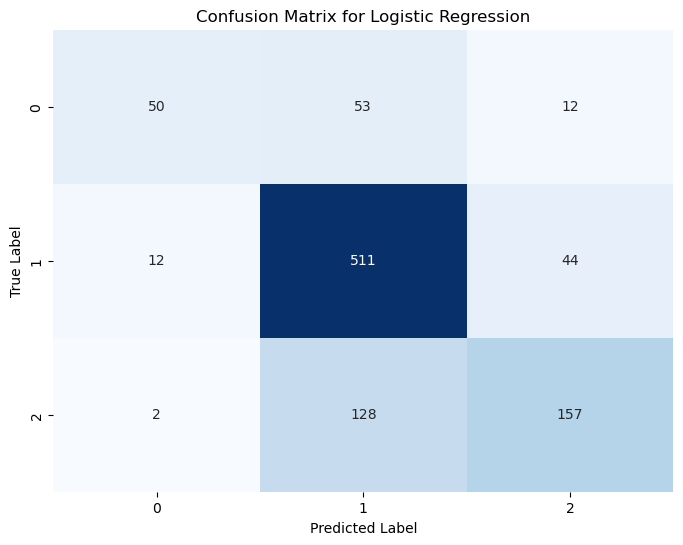

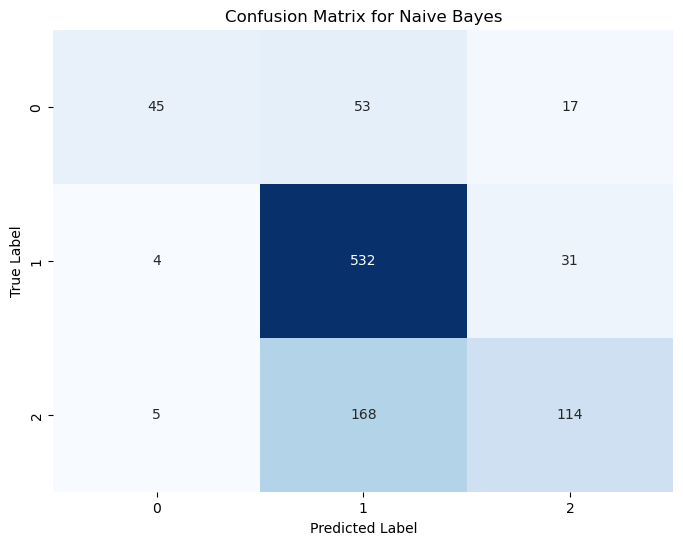

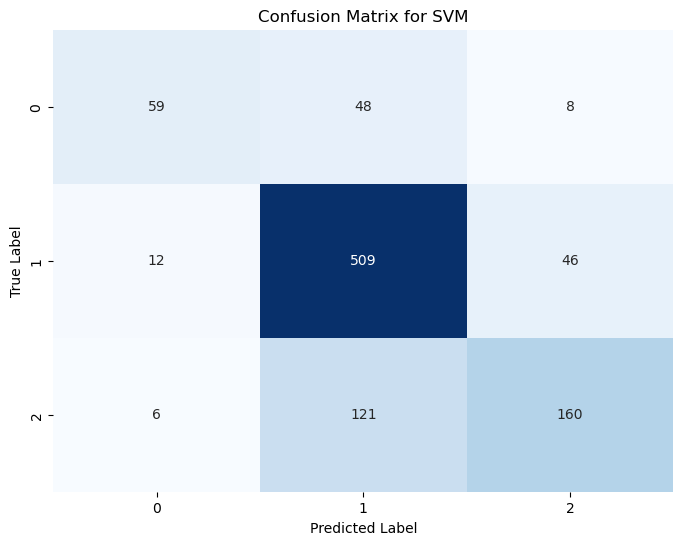

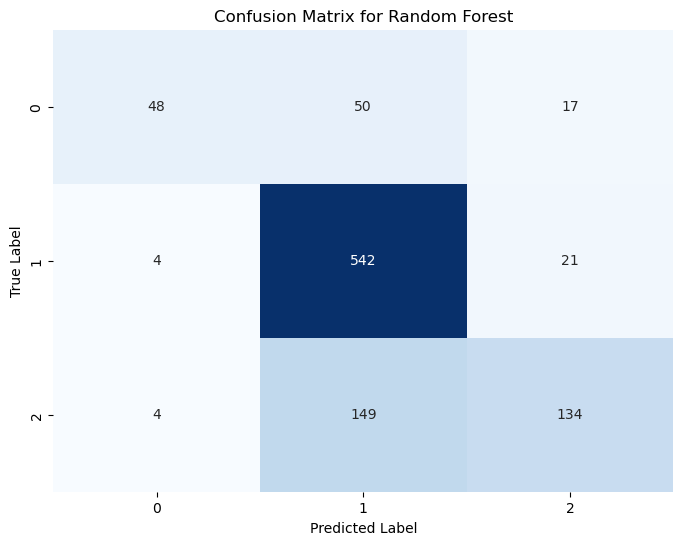

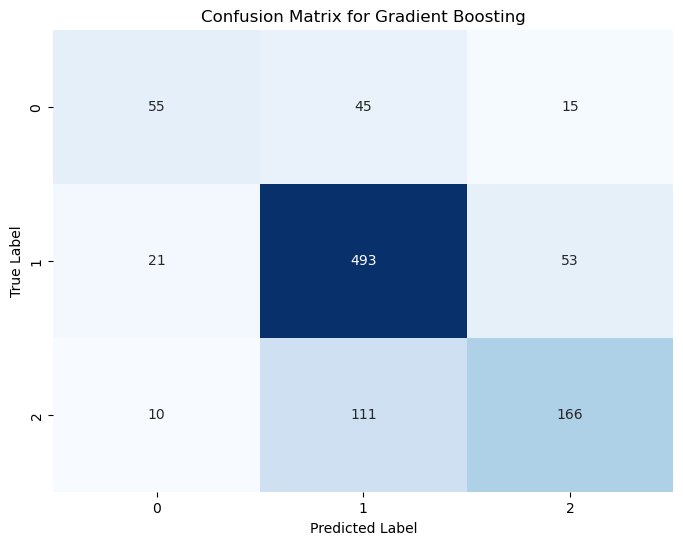

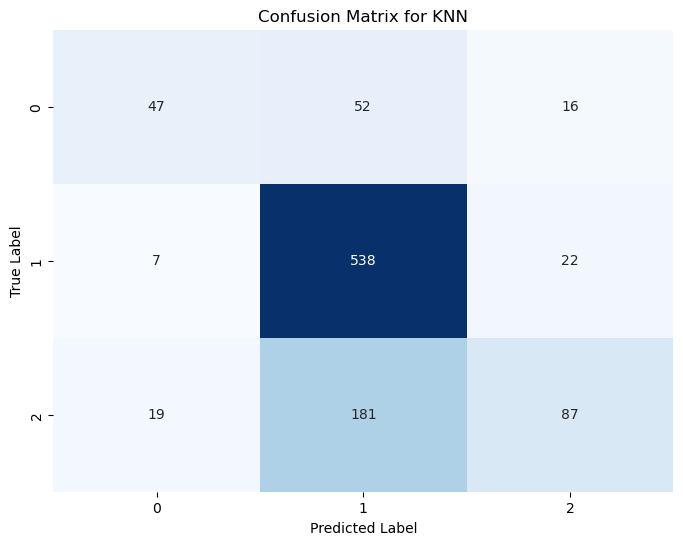

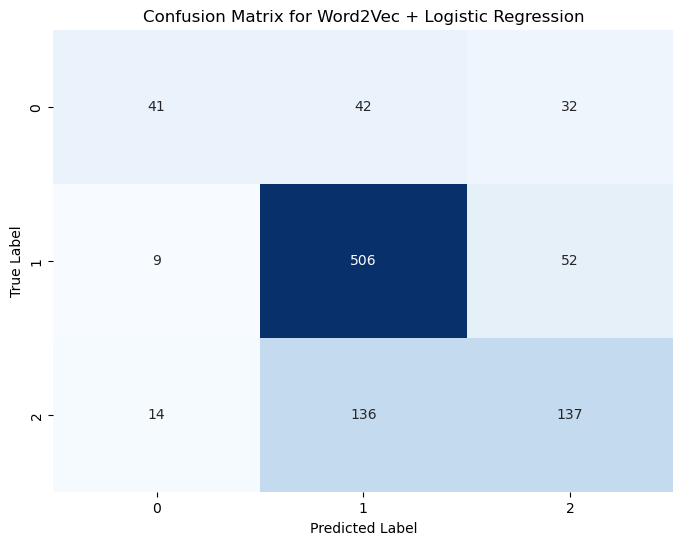

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix function
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrix for logistic regression model
plot_confusion_matrix(conf_matrix_lr, "Logistic Regression")

# Plot confusion matrix for Naive Bayes model
plot_confusion_matrix(conf_matrix_nb, "Naive Bayes")

# Plot confusion matrix for SVM model
plot_confusion_matrix(conf_matrix_svm, "SVM")

# Plot confusion matrix for Random Forest model
plot_confusion_matrix(conf_matrix_rf, "Random Forest")

# Plot confusion matrix for Gradient Boosting model
plot_confusion_matrix(conf_matrix_gbm, "Gradient Boosting")

# Plot confusion matrix for KNN model
plot_confusion_matrix(conf_matrix_knn, "KNN")

# Plot confusion matrix for Word2Vec + Logistic Regression model
plot_confusion_matrix(conf_matrix_w2v, "Word2Vec + Logistic Regression")


# LSTM model using Doc2Vec Word embedding  

In [48]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('all-data.csv',delimiter=',',encoding='latin-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [52]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

In [53]:
df.index = range(4845)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

111964

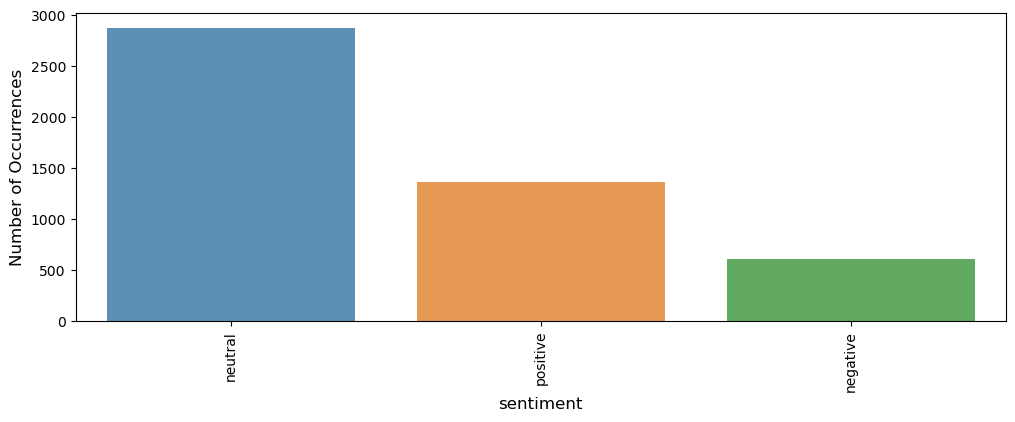

In [54]:
cnt_pro = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [55]:
#Convert sting to numeric
sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

df.sentiment = [sentiment[item] for item in df.sentiment] 
print(df)

      sentiment                                            Message
0             1  Technopolis plans to develop in stages an area...
1             2  The international electronic industry company ...
2             0  With the new production plant the company woul...
3             0  According to the company 's updated strategy f...
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...         ...                                                ...
4840          2  LONDON MarketWatch -- Share prices ended lower...
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...
4843          2  Net sales of the Paper segment decreased to EU...
4844          2  Sales in Finland decreased by 10.5 % in Januar...

[4845 rows x 2 columns]


In [56]:
def print_message(index):
    example = df[df.index == index][['Message', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)

Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .
Message: 0


In [57]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22628\2959445239.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


In [58]:
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22628\2959445239.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


Found 4845 unique tokens.


In [59]:
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4845, 50)


In [60]:
#train_tagged.values[2173]
train_tagged.values

array([TaggedDocument(words=['upm-kymmene', 'has', 'generated', 'four', 'consecutive', 'quarters', 'of', 'positive', 'free', 'cash', 'flow', '.'], tags=[0]),
       TaggedDocument(words=['in', 'the', 'method', 'the', 'smelt', 'spouts', '2', 'are', 'separated', 'from', 'the', 'working', 'area', '6', 'by', 'a', 'shielding', 'wall', '8', ',', '10', 'arranged', 'movable', 'in', 'relation', 'to', 'the', 'smelt', 'spouts', '.'], tags=[1]),
       TaggedDocument(words=['``', 'that', "'s", 'a', 'very', 'high', 'figure', 'on', 'the', 'european', 'scale', ',', '``', 'noop', 'said', ',', 'recalling', 'however', 'that', 'this', 'also', 'includes', 'beer', 'bought', 'by', 'finnish', 'tourists', '.'], tags=[1]),
       ...,
       TaggedDocument(words=['proha', 'plc', '(', 'euronet', ':7327', ')', 'announced', 'today', '(', '19', 'may', ')', 'that', 'its', 'fully-owned', 'subsidiary', ',', 'safran', 'software', 'solutions', 'as', ',', 'has', 'agreed', 'to', 'sell', 'its', '49', '%', 'share', 'of', '

In [61]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|█████████████████████████████████████████████████████████████████████████| 4844/4844 [00:00<00:00, 1493692.73it/s]


In [62]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|█████████████████████████████████████████████████████████████████████████| 4844/4844 [00:00<00:00, 1684258.36it/s]


CPU times: total: 6.67 s
Wall time: 12.9 s


In [63]:
print(d2v_model)


Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [64]:
len(d2v_model.wv.key_to_index)
len(d2v_model.wv.index_to_key)

11682

In [66]:
# save the vectors in a new matrix
embedding_matrix = np.zeros((len(d2v_model.wv.key_to_index)+ 1, 20))

for i, vec in enumerate(d2v_model.docvecs.docvecs[doc_id]):
    while i in vec <= 1000:
        print(i)
        print(model.docvecs)
        embedding_matrix[i]=vec
        print(vec)
        print(vec[i])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22628\396647464.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  for i, vec in enumerate(d2v_model.docvecs.docvecs[doc_id]):


AttributeError: 'KeyedVectors' object has no attribute 'docvecs'

In [68]:
d2v_model.wv.most_similar(positive=['profit'], topn=10)


[('loss', 0.8792965412139893),
 ('income', 0.8081946969032288),
 ('aspokem', 0.7729852795600891),
 ('profits', 0.7679020166397095),
 ('bill', 0.7665855288505554),
 ('sales', 0.7486307621002197),
 ('walby', 0.7383885383605957),
 ('turnover', 0.7376371026039124),
 ('koduetra', 0.7341256141662598),
 ('wwd', 0.721751868724823)]

In [69]:
d2v_model.wv.most_similar(positive=['investment'], topn=10)


[('wrt1v', 0.7808139324188232),
 ('syndicated', 0.769237220287323),
 ('annual', 0.7384397387504578),
 ('eur400m', 0.7249521017074585),
 ('fleet', 0.7185519337654114),
 ('sponda', 0.7048379778862),
 ('bear', 0.697820246219635),
 ('worth', 0.6975498199462891),
 ('meats', 0.6888282895088196),
 ('organization', 0.6863129734992981)]

In [70]:
d2v_model.wv.most_similar(positive=['broke'], topn=10)

[('mold', 0.9639113545417786),
 ('3.81', 0.8989024758338928),
 ('743', 0.8895621299743652),
 ('2.16', 0.8798056244850159),
 ('peterson', 0.8701069951057434),
 ('appliance', 0.8698903322219849),
 ('165', 0.8420581817626953),
 ('enp', 0.8406299948692322),
 ('frank', 0.8405425548553467),
 ('0.32', 0.8368033170700073)]

In [71]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in d2v_model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [72]:
tsne_plot(d2v_model.wv.key_to_index)
#d2v_model

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [73]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


# LSTM model building 

In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


# init layer
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(d2v_model.wv.index_to_key)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(3,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            233660    
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 248013 (968.80 KB)
Trainable params: 248013 (968.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [75]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4118, 50) (4118, 3)
(727, 50) (727, 3)


In [77]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs=30, batch_size=batch_size, verbose = 2)

Epoch 1/30
129/129 - 4s - loss: 0.0177 - acc: 0.9932 - 4s/epoch - 29ms/step
Epoch 2/30
129/129 - 3s - loss: 0.0149 - acc: 0.9944 - 3s/epoch - 27ms/step
Epoch 3/30
129/129 - 3s - loss: 0.0176 - acc: 0.9915 - 3s/epoch - 26ms/step
Epoch 4/30
129/129 - 3s - loss: 0.0109 - acc: 0.9964 - 3s/epoch - 26ms/step
Epoch 5/30
129/129 - 3s - loss: 0.0090 - acc: 0.9964 - 3s/epoch - 24ms/step
Epoch 6/30
129/129 - 3s - loss: 0.0075 - acc: 0.9973 - 3s/epoch - 20ms/step
Epoch 7/30
129/129 - 3s - loss: 0.0136 - acc: 0.9947 - 3s/epoch - 20ms/step
Epoch 8/30
129/129 - 3s - loss: 0.0127 - acc: 0.9942 - 3s/epoch - 21ms/step
Epoch 9/30
129/129 - 3s - loss: 0.0106 - acc: 0.9961 - 3s/epoch - 21ms/step
Epoch 10/30
129/129 - 3s - loss: 0.0086 - acc: 0.9964 - 3s/epoch - 21ms/step
Epoch 11/30
129/129 - 3s - loss: 0.0063 - acc: 0.9966 - 3s/epoch - 21ms/step
Epoch 12/30
129/129 - 3s - loss: 0.0057 - acc: 0.9978 - 3s/epoch - 21ms/step
Epoch 13/30
129/129 - 3s - loss: 0.0053 - acc: 0.9976 - 3s/epoch - 21ms/step
Epoch 14

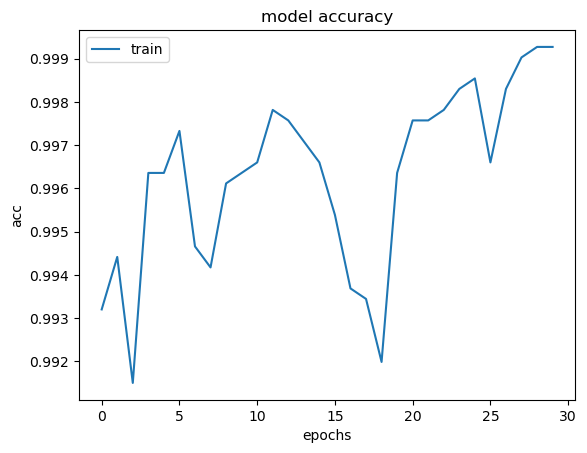

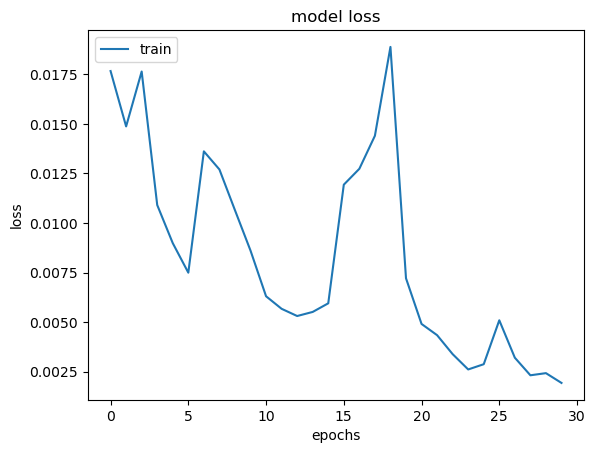

<Figure size 640x480 with 0 Axes>

In [78]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [79]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

129/129 - 2s - loss: 0.0017 - acc: 0.9990 - 2s/epoch - 18ms/step
23/23 - 0s - loss: 1.3350 - acc: 0.7043 - 296ms/epoch - 13ms/step
Train: 0.999, Test: 0.7043


In [80]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs, axis=1)
print(yhat_classes)

[[1.85368909e-03 9.98115778e-01 3.05304129e-05]
 [9.99999881e-01 1.11953270e-07 5.27673087e-08]
 [1.02590555e-07 9.99999881e-01 1.22642918e-08]
 ...
 [3.62188484e-06 3.33201297e-06 9.99993086e-01]
 [4.61429909e-06 9.99994993e-01 4.12303962e-07]
 [1.00000000e+00 4.08128287e-09 2.91533753e-09]]
[1 0 1 0 1 1 1 1 1 1 1 1 0 2 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 2 1 1 1 2 1 0 2
 0 1 1 0 1 0 1 0 1 1 1 0 1 2 1 0 2 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 0 1 2 0 0 0 0 1 0 1 0 0 1 1 2 1 1 0 1 0 1 2 1 1 2 0 0 1 1 2 1 1
 1 2 1 1 0 1 0 2 0 0 0 0 1 1 1 0 1 0 1 1 1 2 1 0 1 0 1 1 0 1 1 1 1 1 1 2 1
 0 1 1 0 1 1 1 0 0 1 2 2 0 1 1 0 0 0 1 2 1 0 1 0 0 1 0 2 0 0 1 0 1 0 0 1 1
 2 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 2 0 0 1 0
 1 1 1 1 1 0 0 1 1 0 1 1 2 2 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 2 0 1 1 1
 1 1 0 1 0 2 2 2 1 1 1 1 1 2 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 2 0 1 2 1
 1 2 0 1 0 1 1 1 1 0 1 2 1 0 1 2 0 2 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 0 1 2 1 0 

In [81]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1,
       2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0,

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm

array([[137,  72,   6],
       [ 78, 324,  24],
       [ 15,  20,  51]], dtype=int64)

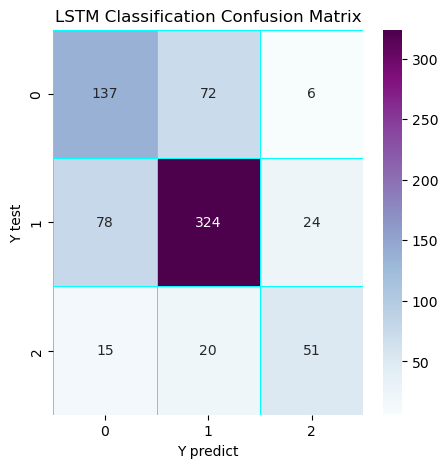

In [83]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [84]:
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

4/4 [==============================] - 0s 14ms/step - loss: 1.4415 - acc: 0.7436
score: 1.44
acc: 0.74


In [91]:
message = ['Congratulations!']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 42ms/step
[[0.07929023 0.35338932 0.56732047]] 2


# Testing with examples
  0 = negative, 1 = neutral, 2 = positive

In [86]:
message = ['such massive asteroid hit will certainly create new business opportunities']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 44ms/step
[[4.4010906e-03 2.7898516e-04 9.9531990e-01]] 2


In [89]:
message = ['so does anyone else not open Snapchat anymore ? or is it just me ... ugh this so sad.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 44ms/step
[[9.610366e-11 1.000000e+00 9.772158e-11]] 1


In [90]:
message = ['The local electronics industry is amid layoff concerns and last year has laid off tens of employees']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 49ms/step
[[1.4385699e-07 2.3568324e-08 9.9999988e-01]] 2
